<a href="https://colab.research.google.com/github/VenkatRamana125/ML-Projects/blob/main/Gold_Price_Prediction_Using_Random_Forest_Regressor_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the essential libraries for our project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# From here the data collection and data preprocessing  and data cleaning will be done
# uploading our csv file into our notebook
from google.colab import files
upload=files.upload()

Saving gld_price_data.csv to gld_price_data.csv


In [ ]:
#reading our csv file
gold_data=pd.read_csv("gld_price_data.csv")
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# to know how many rows and columns are present in our current dataset
gold_data.shape

(2290, 6)

In [ ]:
# To get an detailed Review on our Dataset we use describe()
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_data.isnull().sum()
#checking whether there are any null values present in our data set or not

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#printing first 5 rows from our dataset
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#printing last 5 rows from our dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# checking the co relation whether it is an positive or negative corelaion
correlation=gold_data.corr()

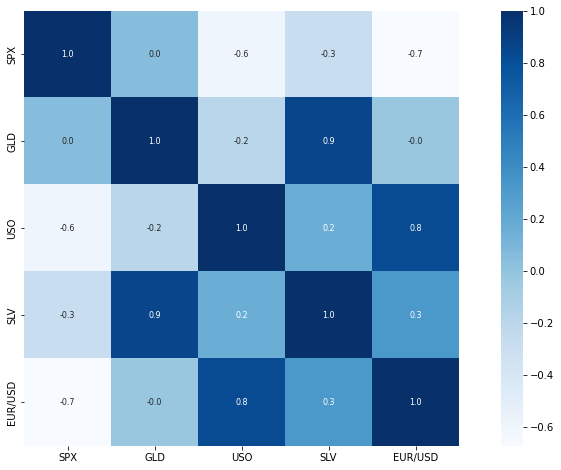

In [ ]:
# plotting an heatmap using seaborn to understand the 
# cbar means colorbar
# annot means annotation
# fmt means to mention the decimal points in the square
#  cmap means color of the map..here we have taken blue anycolor can be taken


plt.figure(figsize=(15,8))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')


In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


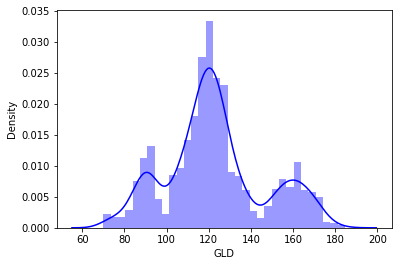

In [ ]:
# Here we are checking the distribution of the Various GLD Prices as per our dataset
sns.distplot(gold_data['GLD'],color='blue')

In [ ]:
# Here we are splitting our Features into X and Y  and Target evaluation

X = gold_data.drop(['Date','GLD'],axis=1) # when dropping a row mention axis as 1 and for column mention axis as 0
Y = gold_data['GLD']

In [ ]:
#printing our Splitted X and Y features
print(X)
print(Y) # this contains all the gold prices

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
# Splitting our feature set into Training data and Test Data for prediction

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
# Model Training:Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# Training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()


In [ ]:
# Model Evaluation
# Prediciton on our test data

test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction) # these are the values predicted by our model

[168.51299943  82.17569986 116.05880034 127.6877005  120.84590124
 154.79079711 150.12129848 126.20510032 117.49489879 126.09050022
 116.42540108 171.87230089 140.98369802 167.94829876 115.26590011
 117.56900045 139.09730257 170.28590061 159.79920308 158.5491994
 154.94119999 125.32919999 176.22260003 156.70430288 125.22210053
  93.63509938  77.1920001  120.66159979 119.0794994  167.48259992
  88.24850066 125.39410006  91.23210083 117.65929982 121.20229929
 136.42700078 115.35570134 114.84680096 147.95759983 107.20940111
 104.33110275  87.11599796 126.51840025 117.90320007 152.4863991
 119.43690017 108.45079972 108.27049834  93.30290053 127.02579805
  75.31960034 113.66739967 121.37080003 111.24589921 118.84439893
 120.66159943 158.93650001 168.35330123 146.99299698  86.02309847
  94.11730068  86.79539909  90.45980019 119.01090089 126.46340055
 127.48950024 169.93270089 122.25659904 117.445199    98.83240036
 168.66680238 142.61769783 132.41590253 121.24460217 120.65169953
 119.7191004

In [ ]:
# Printing our prediction accuracy error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.989197948082049


In [ ]:
Y_test = list(Y_test)

In [ ]:
Y_test

[168.020004,
 81.230003,
 112.32,
 127.589996,
 119.620003,
 154.210007,
 148.910004,
 126.190002,
 117.470001,
 125.739998,
 115.379997,
 167.119995,
 141.630005,
 169.559998,
 115.599998,
 119.669998,
 132.949997,
 170.399994,
 159.369995,
 173.529999,
 154.720001,
 128.119995,
 177.720001,
 157.190002,
 125.309998,
 93.400002,
 76.790001,
 119.690002,
 118.989998,
 167.389999,
 87.5,
 124.980003,
 91.230003,
 115.489998,
 120.949997,
 133.809998,
 116.690002,
 113.809998,
 133.580002,
 105.970001,
 105.120003,
 87.959999,
 126.82,
 116.860001,
 159.259995,
 119.459999,
 109.160004,
 108.620003,
 93.269997,
 127.160004,
 72.260002,
 113.470001,
 119.68,
 109.139999,
 119.309998,
 120.050003,
 159.889999,
 161.490005,
 146.740005,
 85.809998,
 93.709999,
 85.550003,
 91.029999,
 118.489998,
 126.449997,
 126.980003,
 171.699997,
 122.400002,
 116.410004,
 97.959999,
 169.630005,
 142.639999,
 131.809998,
 121.360001,
 124.0,
 119.699997,
 113.889999,
 118.919998,
 105.639999,
 127.669

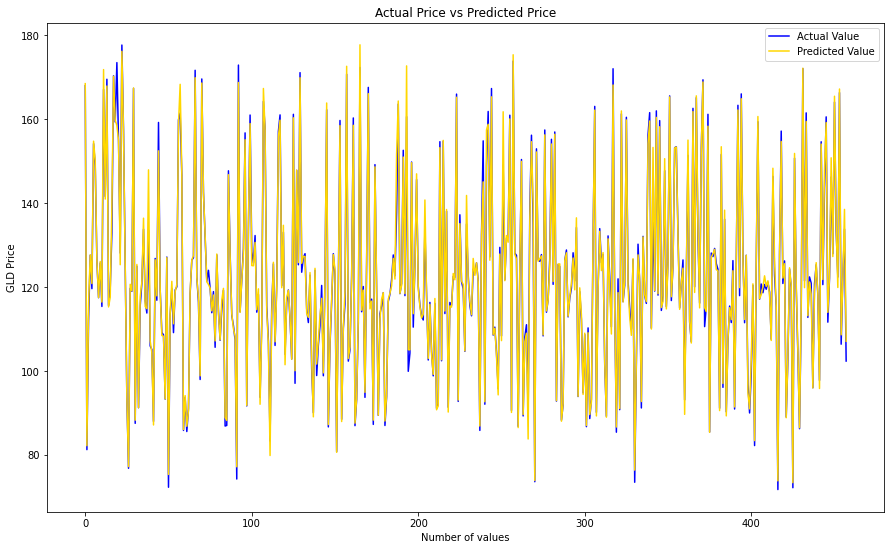

In [ ]:
#Comparing  the Actual Values and Predicted Values of gold price in a graph using matplot
plt.figure(figsize=(15,9))
plt.plot(Y_test, color='Blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='Gold', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()